# 対数リターン

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [79]:
def get_stock_data(ticker, start, end):
    df = yf.download(ticker, start=start, end=end)
    df['log_adj_close'] = np.log(df['Adj Close'])
    df['log_adj_close_diff'] = df['log_adj_close'].diff()
    return df

In [80]:
df_ivv = get_stock_data('IVV', '2010-01-01', '2020-01-01')
df_agg = get_stock_data('AGG', '2010-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


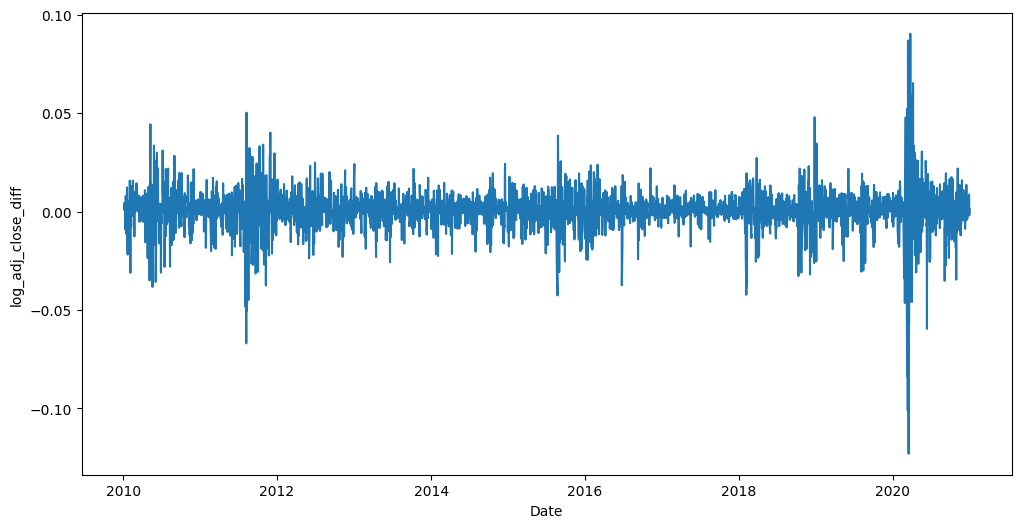

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ivv, x='Date', y='log_adj_close_diff');

In [62]:
np.median(df_ivv['log_adj_close_diff'].dropna())

0.0007466225295855722

In [94]:
df_ivv

Price,Adj Close,Close,High,Low,Open,Volume,log_adj_close,log_adj_close_diff
Ticker,IVV,IVV,IVV,IVV,IVV,IVV,,
Date,,,,,,,,
2010-01-04,86.506683,113.650002,113.739998,112.709999,112.769997,3574200,4.460222,NaN
2010-01-05,86.757866,113.980003,114.029999,113.250000,113.620003,2784100,4.463121,0.002899
2010-01-06,86.826378,114.070000,114.339996,113.790001,113.889999,3912800,4.463910,0.000789
2010-01-07,87.206940,114.570000,114.669998,113.550003,113.870003,2977600,4.468284,0.004373
2010-01-08,87.503807,114.959999,114.970001,114.010002,114.230003,2887600,4.471682,0.003398
...,...,...,...,...,...,...,...,...
2019-12-24,299.522339,322.649994,322.929993,322.309998,322.869995,2716300,5.702189,0.000124
2019-12-26,301.072662,324.320007,324.329987,323.019989,323.059998,2847400,5.707352,0.005163


In [128]:
def get_performance(data, annual_day=252):
    name = data.columns[1][1]
    t = len(data['log_adj_close_diff'])

    # Mean
    daily_log_return = np.mean(data['log_adj_close_diff'])
    annualized_log_return = daily_log_return * annual_day

    # Median
    daily_log_median = np.median(data['log_adj_close_diff'].dropna())
    annualized_log_median = daily_log_median * annual_day

    # Volatility
    daily_volatility = np.std(data['log_adj_close_diff'])
    annualized_volatility = daily_volatility * np.sqrt(annual_day)

    return name, annualized_log_return, annualized_log_median, annualized_volatility

In [140]:
df_performance = pd.DataFrame()
dataset = [df_ivv, df_agg]
for data in dataset:
    name, annualized_log_return, annualized_log_median, annualized_volatility = get_performance(data)
    df_performance = pd.concat([
        df_performance,
        pd.DataFrame({
            'Name': [name],
            'Annualized Log Return': [annualized_log_return],
            'Annualized Log Median': [annualized_log_median],
            'Annualized Volatility': [annualized_volatility]
        })
    ])

In [141]:
df_performance

,Name,Annualized Log Return,Annualized Log Median,Annualized Volatility
0,IVV,0.124627,0.167933,0.147583
0,AGG,0.035865,0.047600,0.032349


In [ ]:
def get_portfolio_performance(weights, data):
    portfolio = np.dot(data['log_adj_close_diff'].dropna(), weights)
    annualized_portfolio = portfolio * 252
    print(f'portfolio: {annualized_portfolio:.2f}')
    